<b>3.Twitter Sentiment Analysis<b>

In [1]:
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import html

In [2]:
tweet=pd.read_csv('Atiku_tweets.csv')

In [3]:
new_data = tweet.drop_duplicates('tweet_full_text',keep='first') #delete the duplicates by dropping them and store the result value to a new variable
new_data.head()

,tweet_created_at,tweet_id,tweet_id_str,tweet_full_text,tweet_truncated,tweet_display_text_range,tweet_entities,tweet_entities_mentions,tweet_entities_hashtags,tweet_entities_urls,...,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_translator_type,user_withheld_in_countries,tweet_source_url
0,2022-11-09 03:31:52+00:00,1590185374638571522,1590185374638571522,@raypaxful @PeterObi @atiku @officialABAT @ine...,False,"[55, 197]","{'hashtags': [], 'symbols': [], 'user_mentions...","@raypaxful, @PeterObi, @atiku, @officialABAT, ...",NaN,NaN,...,True,True,True,False,False,False,False,none,[],http://twitter.com/download/android
1,2022-11-09 03:30:20+00:00,1590184988099477506,1590184988099477506,RT @atiku: My thoughts and prayers are with th...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",@atiku,NaN,NaN,...,True,True,True,False,False,False,False,none,[],http://twitter.com/download/android
2,2022-11-09 03:29:36+00:00,1590184805492477952,1590184805492477952,@YeleSowore @atiku @PeterObi @officialABAT @Ye...,False,"[43, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","@YeleSowore, @atiku, @PeterObi, @officialABAT,...",NaN,NaN,...,True,False,True,False,False,False,False,none,[],http://twitter.com/download/iphone
3,2022-11-09 03:29:24+00:00,1590184756553330689,1590184756553330689,RT @bereket12021664: The 🇪🇹n Gov. &amp; TPLF r...,False,"[0, 144]","{'hashtags': [{'text': 'TPLF', 'indices': [84,...","@bereket12021664, @martinplaut",#TPLF,NaN,...,True,True,True,False,False,False,False,none,[],http://twitter.com/download/android
4,2022-11-09 03:27:29+00:00,1590184273864454145,1590184273864454145,RT @raybullionzzz7: @YeleSowore @atiku @PeterO...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","@raybullionzzz7, @YeleSowore, @atiku, @PeterOb...",NaN,NaN,...,True,True,True,False,False,False,False,none,[],http://twitter.com/download/android


In [4]:
new_data.to_csv(r'my_new_sample.csv', index = False)
new_sample = pd.read_csv('my_new_sample.csv')
new_sample.head()
tweets = new_sample['tweet_full_text']
tweets.head()

0    @raypaxful @PeterObi @atiku @officialABAT @ine...
1    RT @atiku: My thoughts and prayers are with th...
2    @YeleSowore @atiku @PeterObi @officialABAT @Ye...
3    RT @bereket12021664: The 🇪🇹n Gov. &amp; TPLF r...
4    RT @raybullionzzz7: @YeleSowore @atiku @PeterO...
Name: tweet_full_text, dtype: object

In [5]:
for i in range (len(tweets)):
    x = tweets[i].replace("\n"," ") #cleaning newline “\n” from the tweets
tweets[i] = html.unescape(x)
tweets.head()

<ipython-input-5-0aa6cd3f07c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = html.unescape(x)


0    @raypaxful @PeterObi @atiku @officialABAT @ine...
1    RT @atiku: My thoughts and prayers are with th...
2    @YeleSowore @atiku @PeterObi @officialABAT @Ye...
3    RT @bereket12021664: The 🇪🇹n Gov. &amp; TPLF r...
4    RT @raybullionzzz7: @YeleSowore @atiku @PeterO...
Name: tweet_full_text, dtype: object

In [6]:
for i in range (len(tweets)):
    tweets[i] = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", tweets[i])

<ipython-input-6-fe1ce977eacf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", tweets[i])


In [7]:
df=pd.DataFrame(tweets)

In [8]:
df=df[~df.tweet_full_text.str.contains('RT')]

In [9]:
df.head()

,tweet_full_text
0,This whole thing is nonsense and waste of...
2,You are not any better you just havent ha...
10,Why sowore no take am to courtNo be Candi...
11,What is the difference between a drug runn...
14,Funny enough you follow sign Peace Accord...


In [10]:
from textblob import TextBlob
## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df['Subjectivity']=df['tweet_full_text'].apply(getSubjectivity)
df['Polarity']=df['tweet_full_text'].apply(getPolarity)
## show new Dataframe
df

,tweet_full_text,Subjectivity,Polarity
0,This whole thing is nonsense and waste of...,0.200000,0.000000
2,You are not any better you just havent ha...,0.500000,0.500000
10,Why sowore no take am to courtNo be Candi...,0.000000,0.000000
11,What is the difference between a drug runn...,0.000000,0.000000
14,Funny enough you follow sign Peace Accord...,0.650000,0.441667
...,...,...,...
1016,Atiku is not destined to become the presiden...,0.000000,0.000000
1018,We love you,0.600000,0.500000
1019,Mr presidential candidate please unify your p...,0.233333,0.316667
1020,Atiku is the man\nThe unifier the bridge buil...,0.000000,0.000000


In [11]:
## creating function to compute positive, negative and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
print(df)

                                        tweet_full_text  Subjectivity  \
0          This whole thing is nonsense and waste of...      0.200000   
2          You are not any better you just havent ha...      0.500000   
10         Why sowore no take am to courtNo be Candi...      0.000000   
11        What is the difference between a drug runn...      0.000000   
14         Funny enough you follow sign Peace Accord...      0.650000   
...                                                 ...           ...   
1016    Atiku is not destined to become the presiden...      0.000000   
1018                                       We love you       0.600000   
1019   Mr presidential candidate please unify your p...      0.233333   
1020   Atiku is the man\nThe unifier the bridge buil...      0.000000   
1021                          May God comfort them Amen      0.000000   

      Polarity  Analysis  
0     0.000000   Neutral  
2     0.500000  Positive  
10    0.000000   Neutral  
11    0.000000 

<b> We then plot the sentiments<b>

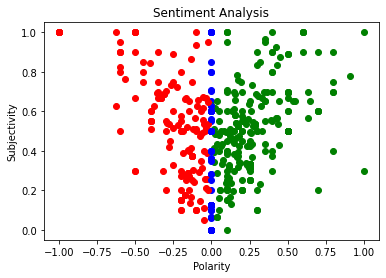

In [12]:
from matplotlib import pyplot as plt
## plot polarity and subjectivity
for index,row in df.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

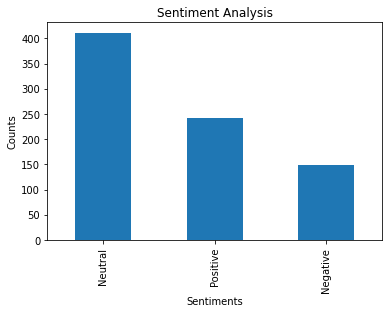

In [13]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['tweet_full_text']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [14]:
df = df[df['Analysis'] != 'Neutral']

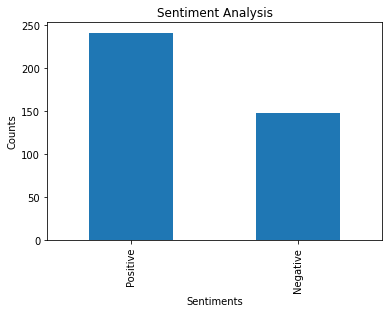

In [16]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['tweet_full_text']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

<b> The figure above shows that the positive sentiments are way higher(more than double) the negative sentiments<b>

In [17]:
# Using map function
df['Analysis'] = df['Analysis'].map({'Positive': 1, 'Negative': 0})

<ipython-input-17-06661aec017c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Analysis'].map({'Positive': 1, 'Negative': 0})


In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
sample_new = ['This is first method.', 'This method is the second method.', 'This new one is the third one.' ]

In [20]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_new)

In [21]:
#Lets see the extracted unique words
print (vectorizer.get_feature_names())

['first', 'is', 'method', 'new', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
X

<3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [23]:
print(X.toarray())

[[1 1 1 0 0 0 0 0 1]
 [0 1 2 0 0 1 1 0 1]
 [0 1 0 1 2 0 1 1 1]]


In [24]:
second_sample = ['Hello World.', 'Hello Hello World', 'Hello World world world']
XX = vectorizer.fit_transform(second_sample)
print(XX.toarray())

[[1 1]
 [2 1]
 [1 3]]


In [25]:
def text_cleaning(text):
    remv_punc = [char for char in text.lower() if char not in string.punctuation]
    remv_punc_join = ''.join(remv_punc)
    remv_punc_clean = [word for word in remv_punc_join.split() if word.lower() not in stopwords.words('english')]
    return remv_punc_clean

In [26]:
#Lets visualize the newly created function
tweets_df_clean = df['tweet_full_text'].apply(text_cleaning)
print(tweets_df_clean)

2               [better, havent, opportunity, yet, steal]
14      [funny, enough, follow, sign, peace, accord, c...
26      [12, 878, months, time, election, hold, vote, ...
28      [fake, news, merchantobi, one, picture, crooki...
31                                       [real, criminal]
                              ...                        
1005    [thats, sad, one, honestly, hope, members, are...
1009    [vote, give, look, around, let, know, happy, w...
1015    [see, rubbish, reply, atiku, goes, smelling, m...
1018                                               [love]
1019    [mr, presidential, candidate, please, unify, p...
Name: tweet_full_text, Length: 389, dtype: object


In [27]:
vectorizer_analyzer = CountVectorizer(analyzer = text_cleaning)
countvectorizer_tweets = CountVectorizer(analyzer= text_cleaning, dtype= 'uint8').fit_transform(df['tweet_full_text']).toarray()

# MODEL BUILDING

<b>Naive Bayes<b>

In [28]:
from sklearn.model_selection import train_test_split
# Split into training and testing data
X_features = countvectorizer_tweets
y_label = df['Analysis']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 1)

In [30]:
from sklearn.naive_bayes import MultinomialNB
NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(X_train,y_train)

MultinomialNB()

In [31]:
#Analyzing the model performance
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Predicting test cases
y_pred_test = NaiveBclassifier.predict(X_test)

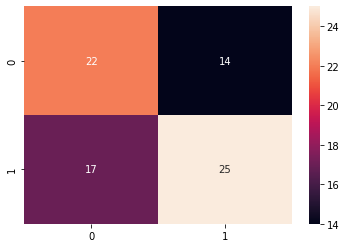

In [33]:
import seaborn as sns
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot= True)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy: 0.6025641025641025


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.56      0.61      0.59        36
           1       0.64      0.60      0.62        42

    accuracy                           0.60        78
   macro avg       0.60      0.60      0.60        78
weighted avg       0.61      0.60      0.60        78



<b> The results show that the Naive Bayes classififer has an accuracy of 60.0%<b>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


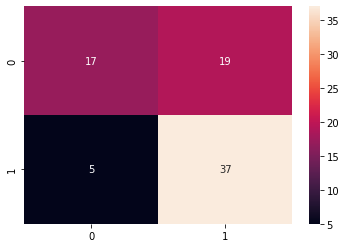

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.47      0.59        36
           1       0.66      0.88      0.76        42

    accuracy                           0.69        78
   macro avg       0.72      0.68      0.67        78
weighted avg       0.71      0.69      0.68        78



<b> Support Vector Machine<b>

In [40]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [41]:
y_pred = clf .predict(X_test)
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Support Vector Machine classifier on test set: 0.71


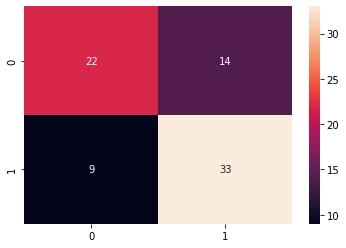

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        36
           1       0.70      0.79      0.74        42

    accuracy                           0.71        78
   macro avg       0.71      0.70      0.70        78
weighted avg       0.71      0.71      0.70        78



<b>K-Nearest Neighbor<b>

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

In [45]:
y_pred = knn .predict(X_test)
print('Accuracy of K-Nearest Neighbor classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-Nearest Neighbor classifier on test set: 0.53


<b>Latent Dirichlet Allocation<b>

In [46]:
import gensim
from gensim import corpora, models, similarities
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

<b>Examining  the full vocabulary of the tweets<b> 

In [47]:
all_words = [word for tokens in df['tweet_full_text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['tweet_full_text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

50588 words total, with a vocabulary size of 71
Max tweet length is 290


<b>I can build a dictionary to make the word cloud once I know the word frequencies.<b>

In [48]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['tweet_full_text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[(' ', 10254),
 ('e', 4431),
 ('o', 3317),
 ('t', 3242),
 ('a', 2973),
 ('i', 2874),
 ('n', 2677),
 ('s', 2281),
 ('r', 2241),
 ('h', 1779),
 ('l', 1688),
 ('u', 1500),
 ('d', 1310),
 ('y', 1062),
 ('c', 900),
 ('m', 893),
 ('g', 842),
 ('p', 788),
 ('w', 760),
 ('f', 717),
 ('b', 673),
 ('k', 390),
 ('v', 355),
 ('O', 192),
 ('A', 185),
 ('I', 182),
 ('\n', 168),
 ('P', 160),
 ('T', 151),
 ('N', 135)]

In [49]:
#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

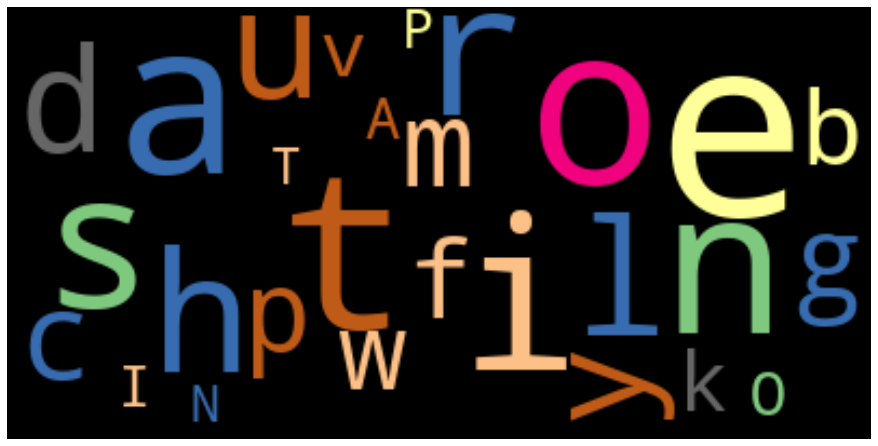

In [50]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tweets=pd.DataFrame(tweets)
docs = tweets['tweet_full_text']
df=pd.DataFrame(docs)
vectorizer = TfidfVectorizer()
df = vectorizer.fit_transform(docs)

In [52]:
print(df.shape)

(1022, 3276)


In [53]:
from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(tweets_df_clean)

#view integer mappings
text_dict.token2id

{'better': 0,
 'havent': 1,
 'opportunity': 2,
 'steal': 3,
 'yet': 4,
 'accord': 5,
 'adebayo': 6,
 'calling': 7,
 'doesnt': 8,
 'enough': 9,
 'even': 10,
 'follow': 11,
 'funny': 12,
 'imagine': 13,
 'kind': 14,
 'know': 15,
 'liar': 16,
 'love': 17,
 'okay': 18,
 'peace': 19,
 'people': 20,
 'peter': 21,
 'play': 22,
 'politics': 23,
 'pulling': 24,
 'sign': 25,
 'u': 26,
 'unit': 27,
 'win': 28,
 'wont': 29,
 '12': 30,
 '878': 31,
 'allow': 32,
 'choice': 33,
 'count': 34,
 'election': 35,
 'hold': 36,
 'inec': 37,
 'months': 38,
 'time': 39,
 'vote': 40,
 'crookif': 41,
 'fake': 42,
 'internet': 43,
 'merchantobi': 44,
 'news': 45,
 'one': 46,
 'picture': 47,
 'criminal': 48,
 'real': 49,
 'baron': 50,
 'drug': 51,
 'fried': 52,
 'openly': 53,
 'plate': 54,
 'rice': 55,
 'supporting': 56,
 'broyou': 57,
 'claim': 58,
 'guys': 59,
 'jumping': 60,
 'lazyalways': 61,
 'lazyyyy': 62,
 'opposition': 63,
 'really': 64,
 'shame': 65,
 'thrash': 66,
 'whats': 67,
 'wonder': 68,
 'yoursno'

In [54]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in tweets_df_clean]

In [55]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.015*"obi" + 0.011*"peter" + 0.007*"atiku" + 0.007*"vote" + 0.007*"amp" + 0.006*"dont" + 0.006*"tinubu" + 0.006*"picture" + 0.006*"po" + 0.005*"want"'),
 (1,
  '0.012*"u" + 0.010*"nigeria" + 0.010*"go" + 0.009*"atiku" + 0.009*"us" + 0.007*"one" + 0.007*"need" + 0.006*"dey" + 0.005*"sir" + 0.005*"money"'),
 (2,
  '0.009*"man" + 0.009*"atiku" + 0.009*"u" + 0.008*"like" + 0.008*"obi" + 0.007*"us" + 0.006*"peter" + 0.006*"1" + 0.006*"know" + 0.006*"drug"'),
 (3,
  '0.009*"u" + 0.009*"like" + 0.008*"amp" + 0.006*"please" + 0.006*"obi" + 0.006*"dey" + 0.006*"one" + 0.005*"country" + 0.004*"youre" + 0.004*"peter"'),
 (4,
  '0.009*"atiku" + 0.009*"peter" + 0.009*"obi" + 0.009*"man" + 0.009*"people" + 0.009*"say" + 0.008*"see" + 0.006*"nigeria" + 0.006*"u" + 0.006*"support"')]

<b>Visualizing a topic model<b>

<b> The most obvious topic depicted is the Nigerian Presidential elections<b>

<B>CONCLUSION <B>

<b>For the sentiment analysis, the best classification model between Naïve Bayes for sentiment analysis/classification, Support Vector Machine for tweet classification,Logistic Regression sentiment classification, and K-Nearest Neighbor for tweet classification was the Support Vector Machine for tweet classification because it had the highest accuracy of 71%<b>